Receptor Protein Tyrosine Kinase erbB-2 CHEMBL1824


Single Protein Type in Homo Sapiens Organism


Predicting pIC50 from Molecular Descriptors

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
from ipynb.fs.full.proj1a_my_functions import get_moldata, get_lip, convert_to_pIC50


In [2]:
df = pd.read_csv('erbB-2_molecules_Ic50.csv', sep=";")

In [3]:
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value
0,CHEMBL257197,NaN,None,473.56,0,4.08,19,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141539,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,CHEMBL3308403,NaN,NaN,NaN
1,CHEMBL257196,NaN,None,445.51,0,3.48,17,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141539,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,CHEMBL3308403,NaN,NaN,NaN
2,CHEMBL256996,NaN,None,473.56,0,4.08,16,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141539,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,CHEMBL3308403,NaN,NaN,NaN
3,CHEMBL497697,NaN,None,390.43,0,2.89,12,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,IC50,'=',...,SINGLE PROTEIN,CHEMBL1155952,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,CHEMBL3308062,NaN,NaN,NaN
4,CHEMBL271668,NaN,None,473.53,0,4.05,17,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,IC50,'=',...,SINGLE PROTEIN,CHEMBL1141561,1,Scientific Literature,Bioorg Med Chem Lett,2008.0,CHEMBL3308403,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,CHEMBL941,IMATINIB,4.0,493.62,0,4.59,Imatinib,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5214926,1,Scientific Literature,Eur J Med Chem,2022.0,None,TIME = 1.0 hr,INHIBITOR,NaN
4068,CHEMBL180022,NERATINIB,4.0,557.05,2,5.93,9,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5131516,1,Scientific Literature,J Med Chem,2022.0,None,TIME = 1.25 hr,INHIBITOR,NaN
4069,CHEMBL3647420,NaN,None,583.09,2,6.47,Pyrotinib,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154811,1,Scientific Literature,J Med Chem,2022.0,None,TIME = 2.0 hr,INHIBITOR,NaN
4070,CHEMBL180022,NERATINIB,4.0,557.05,2,5.93,Neratinib,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,IC50,'=',...,SINGLE PROTEIN,CHEMBL5154811,1,Scientific Literature,J Med Chem,2022.0,None,TIME = 0.5 hr,INHIBITOR,NaN


In [4]:
df.info()  #Seeing all the columns which are in the dataframe, I am most interested in the Chembl id, smiles, and standard value IC50.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Molecule ChEMBL ID          4072 non-null   object 
 1   Molecule Name               1151 non-null   object 
 2   Molecule Max Phase          4072 non-null   object 
 3   Molecular Weight            4072 non-null   object 
 4   #RO5 Violations             4072 non-null   object 
 5   AlogP                       4072 non-null   object 
 6   Compound Key                4072 non-null   object 
 7   Smiles                      4040 non-null   object 
 8   Standard Type               4072 non-null   object 
 9   Standard Relation           3144 non-null   object 
 10  Standard Value              3144 non-null   float64
 11  Standard Units              3165 non-null   object 
 12  pChEMBL Value               2418 non-null   float64
 13  Data Validity Comment       27 no

In [5]:
df1 = df[['Molecule ChEMBL ID', 'Standard Value', 'Standard Units', 'Smiles']].copy() #select only the ones which I am interested in

In [6]:
df1

,Molecule ChEMBL ID,Standard Value,Standard Units,Smiles
0,CHEMBL257197,26.00,nM,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...
1,CHEMBL257196,140.00,nM,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...
2,CHEMBL256996,130.00,nM,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...
3,CHEMBL497697,361.00,nM,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
4,CHEMBL271668,200.00,nM,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...
...,...,...,...,...
4067,CHEMBL941,0.06,nM,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...
4068,CHEMBL180022,59.00,nM,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...
4069,CHEMBL3647420,3.91,nM,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...
4070,CHEMBL180022,5.57,nM,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...


In [7]:
df1['Standard Units'].nunique()

2

In [8]:
df1['Standard Units'].unique()

array(['nM', nan, 'ug.mL-1'], dtype=object)

In [9]:
df1 = df1[df1['Standard Units'].notna()]

In [10]:
df1['Standard Units'].unique()

array(['nM', 'ug.mL-1'], dtype=object)

In [11]:
df1['Standard Units'].value_counts()

nM         3121
ug.mL-1      44
Name: Standard Units, dtype: int64

In [12]:
df1 = df1[df1['Standard Units'] != 'ug.mL-1']

In [13]:
df1['Standard Units'].unique()

array(['nM'], dtype=object)

In [14]:
df1['Standard Units'].nunique()

1

In [15]:
df1['Standard Units'].value_counts()

nM    3121
Name: Standard Units, dtype: int64

In [16]:
df1.shape

(3121, 4)

In [17]:
df1.drop('Standard Units', axis = 1, inplace = True)

In [18]:
df1.shape

(3121, 3)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 4071
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  3121 non-null   object 
 1   Standard Value      3100 non-null   float64
 2   Smiles              3117 non-null   object 
dtypes: float64(1), object(2)
memory usage: 97.5+ KB


In [20]:
df1.dropna(inplace = True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 0 to 4071
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Molecule ChEMBL ID  3096 non-null   object 
 1   Standard Value      3096 non-null   float64
 2   Smiles              3096 non-null   object 
dtypes: float64(1), object(2)
memory usage: 96.8+ KB


In [22]:
df1.to_csv('erb-B2_molecules_Ic50_preprocessed.csv')

In [23]:
df1

,Molecule ChEMBL ID,Standard Value,Smiles
0,CHEMBL257197,26.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...
1,CHEMBL257196,140.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...
2,CHEMBL256996,130.00,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...
3,CHEMBL497697,361.00,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1
4,CHEMBL271668,200.00,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...
...,...,...,...
4067,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...
4068,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...
4069,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...
4070,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...


In [24]:
receptor_class = []
for i in df1['Standard Value']:
    if i >= 10000:
        receptor_class.append('inactive')
    elif i <= 1000:
        receptor_class.append('active')
    else:
        receptor_class.append('intermediate')
            

In [25]:
len(receptor_class)

3096

In [26]:
df2 = pd.Series(receptor_class)

In [27]:
len(df2)

3096

In [28]:
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)  #this will avoid concat to add extra NaN rows

In [29]:
df_fin = pd.concat([df1, df2], axis = 1)

In [30]:
df_fin.shape

(3096, 4)

In [31]:
df_fin.rename(columns = {0: 'Receptor_class'}, inplace = True)

In [32]:
df_fin.tail()

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class
3091,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,active
3092,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active
3093,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active
3094,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active
3095,CHEMBL3647420,9.07,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active


In [33]:
smiles = df_fin['Smiles']

In [34]:
mols = get_moldata(smiles)

In [35]:
df_2 = get_lip(mols) #function that I wrote

In [36]:
df_1 = pd.concat([df_fin, df_2], axis = 1)

In [37]:
df_1

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors
0,CHEMBL257197,26.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0
1,CHEMBL257196,140.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0
2,CHEMBL256996,130.00,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0
3,CHEMBL497697,361.00,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0
4,CHEMBL271668,200.00,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0
...,...,...,...,...,...,...,...,...
3091,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,active,493.615,4.59032,7.0,2.0
3092,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0
3093,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,583.092,6.46508,8.0,2.0
3094,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0


In [38]:
std_val = df_1['Standard Value']

In [39]:
df_3 = convert_to_pIC50(std_val)

In [40]:
df_fin1 = pd.concat([df_1, df_3], axis = 1)

In [41]:
df_fin1

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL257197,26.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0,7.585027
1,CHEMBL257196,140.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0,6.853872
2,CHEMBL256996,130.00,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0,6.886057
3,CHEMBL497697,361.00,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0,6.442493
4,CHEMBL271668,200.00,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0,6.698970
...,...,...,...,...,...,...,...,...,...
3091,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,active,493.615,4.59032,7.0,2.0,10.221849
3092,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,7.229148
3093,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,583.092,6.46508,8.0,2.0,8.407823
3094,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,8.254145


In [42]:
#plot a distribution plot of Std value and another distribution plot of pIC50.

In [43]:
df_fin1['Standard Value'].describe()

count    3.096000e+03
mean     8.497344e+03
std      4.414822e+04
min      6.000000e-02
25%      5.000000e+01
50%      2.100000e+02
75%      2.705000e+03
max      1.600000e+06
Name: Standard Value, dtype: float64

In [44]:
df_fin1['pIC50'].describe()

count    3096.000000
mean        6.477964
std         1.215822
min         2.795880
25%         5.567835
50%         6.677781
75%         7.301030
max        10.221849
Name: pIC50, dtype: float64

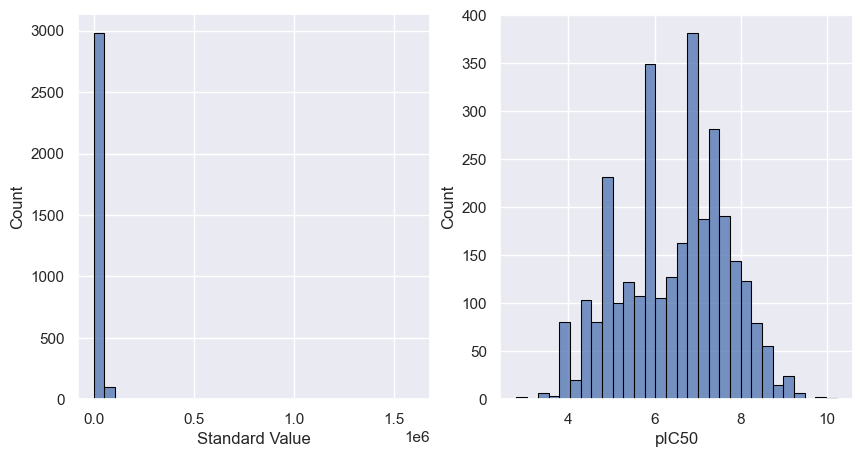

In [45]:
sns.set_theme(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots(1, 2) #1 row 2 columns
sns.histplot(df_fin1['Standard Value'], bins = 30, ax = ax[0], edgecolor = 'black');
sns.histplot(df_fin1['pIC50'], bins = 30, ax = ax[1], edgecolor = 'black');

Changing the values from Standard Value IC50 to pIC50 made the distribution of values more even.

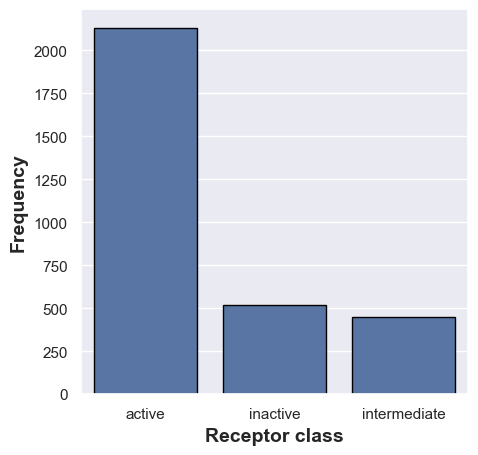

In [46]:
sns.set_theme(rc={'figure.figsize':(5,5)})
sns.countplot(x='Receptor_class', data = df_fin1, edgecolor = 'black')
plt.xlabel('Receptor class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')
plt.savefig('plot_receptor_class.pdf')

In [47]:
df_fin1['Receptor_class'].value_counts()

active          2132
inactive         517
intermediate     447
Name: Receptor_class, dtype: int64

In [48]:
#drop intermediate
df_fin2 = df_fin1[df_fin1.Receptor_class != 'intermediate']
df_fin2

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL257197,26.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0,7.585027
1,CHEMBL257196,140.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0,6.853872
2,CHEMBL256996,130.00,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0,6.886057
3,CHEMBL497697,361.00,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0,6.442493
4,CHEMBL271668,200.00,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0,6.698970
...,...,...,...,...,...,...,...,...,...
3091,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,active,493.615,4.59032,7.0,2.0,10.221849
3092,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,7.229148
3093,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,583.092,6.46508,8.0,2.0,8.407823
3094,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,8.254145


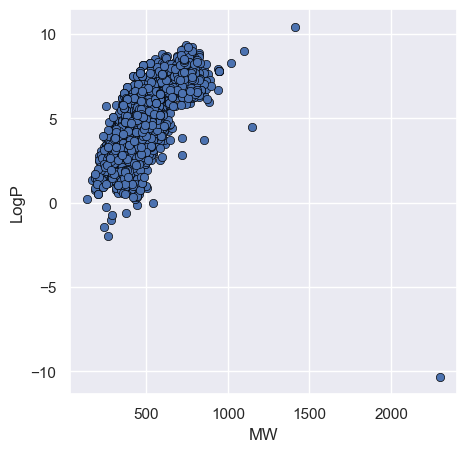

In [49]:
sns.scatterplot(x = 'MW', y = 'LogP', data = df_fin1, edgecolor = 'black');

Text(34.875, 0.5, 'Count')

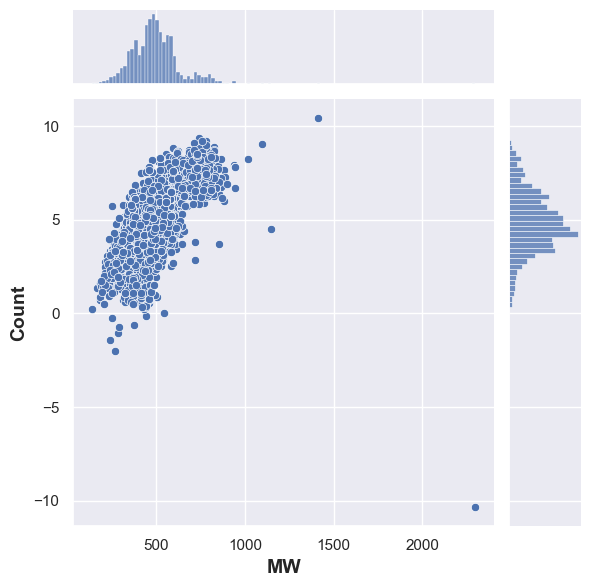

In [50]:
sns.jointplot(x = df_1['MW'], y = df_fin1['LogP']);
plt.xlabel('MW', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count', fontsize = 14, fontweight = 'bold')

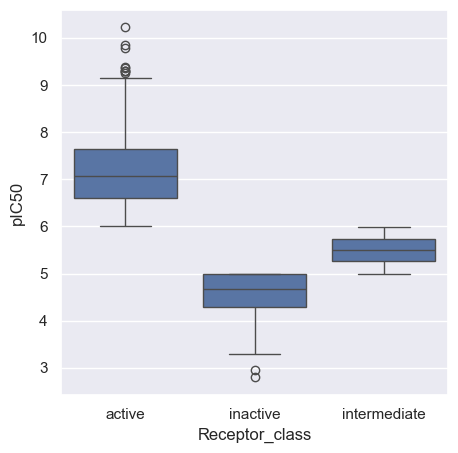

In [51]:
sns.boxplot(x= 'Receptor_class', y = 'pIC50', data = df_fin1);

In [52]:
df_corr = df_1.corr()

C:\Users\e.tiu\AppData\Local\Temp\ipykernel_13104\148733488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_1.corr()


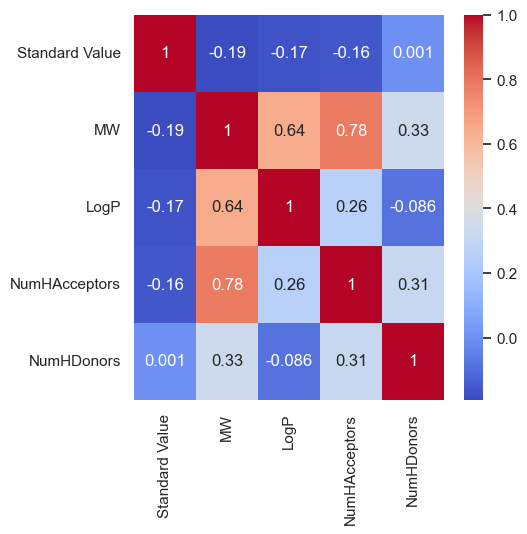

In [53]:
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm');

increase num H acceptors, increase MW
increase MW, decrease IC50
increase LogP, decrease IC50

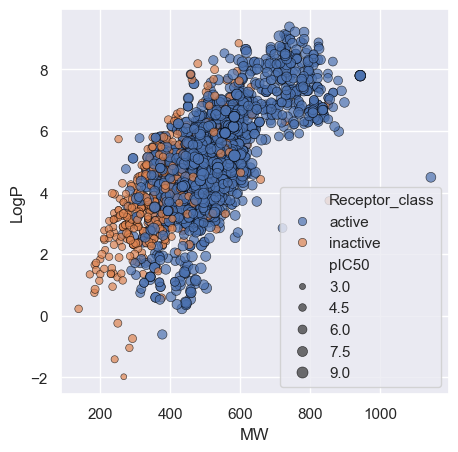

In [54]:
sns.scatterplot(x='MW', y='LogP', data=df_fin2, hue='Receptor_class', size='pIC50', edgecolor='black', alpha=0.7);

In [55]:
#!pip install padelpy

In [56]:
#import padelpy
import time
import glob

In [57]:
#from padelpy import padeldescriptor

In [58]:
#import urllib.request
#url = 'https://github.com/ecrl/padelpy/blob/master/padelpy/PaDEL-Descriptor/descriptors.xml'
#filename = 'descriptors.xml'
#urllib.request.urlretrieve(url, filename)

In [59]:
df_fin1

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL257197,26.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0,7.585027
1,CHEMBL257196,140.00,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0,6.853872
2,CHEMBL256996,130.00,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0,6.886057
3,CHEMBL497697,361.00,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0,6.442493
4,CHEMBL271668,200.00,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0,6.698970
...,...,...,...,...,...,...,...,...,...
3091,CHEMBL941,0.06,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,active,493.615,4.59032,7.0,2.0,10.221849
3092,CHEMBL180022,59.00,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,7.229148
3093,CHEMBL3647420,3.91,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,583.092,6.46508,8.0,2.0,8.407823
3094,CHEMBL180022,5.57,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,active,557.054,5.93248,8.0,2.0,8.254145


In [60]:
df_fin1.to_csv('df_fin1.csv')

In [78]:
#df_fin1.to_csv('df_fin1.smi')  #requirement of padeldescriptor to have .smi

In [79]:
#padeldescriptor(mol_dir = 'df_fin1.smi', d_file = 'df_fin1_wpadeld.csv') #, descriptortypes = PubchemFingerprinter.xml, retainorder = True, fingerprints = True, d_2d = False, d_3d = False)

In [80]:
#trying another way because I am getting error saying Java JRE 6+ not found
#import urllib.request
#url = 'https://github.com/codetodiscovery/fingerprint-padel/raw/main/descriptors_xml.zip'
#filename = 'descriptors_xml.zip'
#urllib.request.urlretrieve(url, filename)

In [81]:
#! unzip descriptors_xml.zip

In [82]:
#! pip install patool #using patool to unzip files

In [85]:
#import patoolib
#patoolib.extract_archive("descriptors_xml.zip") #successful unzipping

In [87]:
#xml_files = glob.glob('*.xml') #find all files with the .xml extension in the current directory.
#xml_files.sort()
#xml_files

In [90]:
#causes error as well JRE 6+ not found
#for i in range(len(xml_files)):
 #   padeldescriptor(mol_dir = 'df_fin1.smi', d_file = 'df_fin1_wpadeld.csv', descriptortypes = xml_files[i], retainorder = True, fingerprints = True, d_2d = False, d_3d = False)

In [91]:
#try another way again (data professor way)
#selection = ['Smiles', 'Molecule ChEMBL ID']
#df_samp = df_fin1[selection]
#df_samp.to_csv('df_fin1.smi', sep = '\t', index = False, header = False)

In [92]:
#but this way uses bash and it does not work here
#! cat padel.sh

In [93]:
#pip install cat

In [96]:
#another way to get the FPs
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df_fin1,'Smiles', 'Structure') #put the structure in the table

In [97]:
df_fin1.head()

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50,Structure
0,CHEMBL257197,26.0,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0,7.585027,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...
1,CHEMBL257196,140.0,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0,6.853872,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...
2,CHEMBL256996,130.0,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0,6.886057,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...
3,CHEMBL497697,361.0,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0,6.442493,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...
4,CHEMBL271668,200.0,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0,6.698970,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...


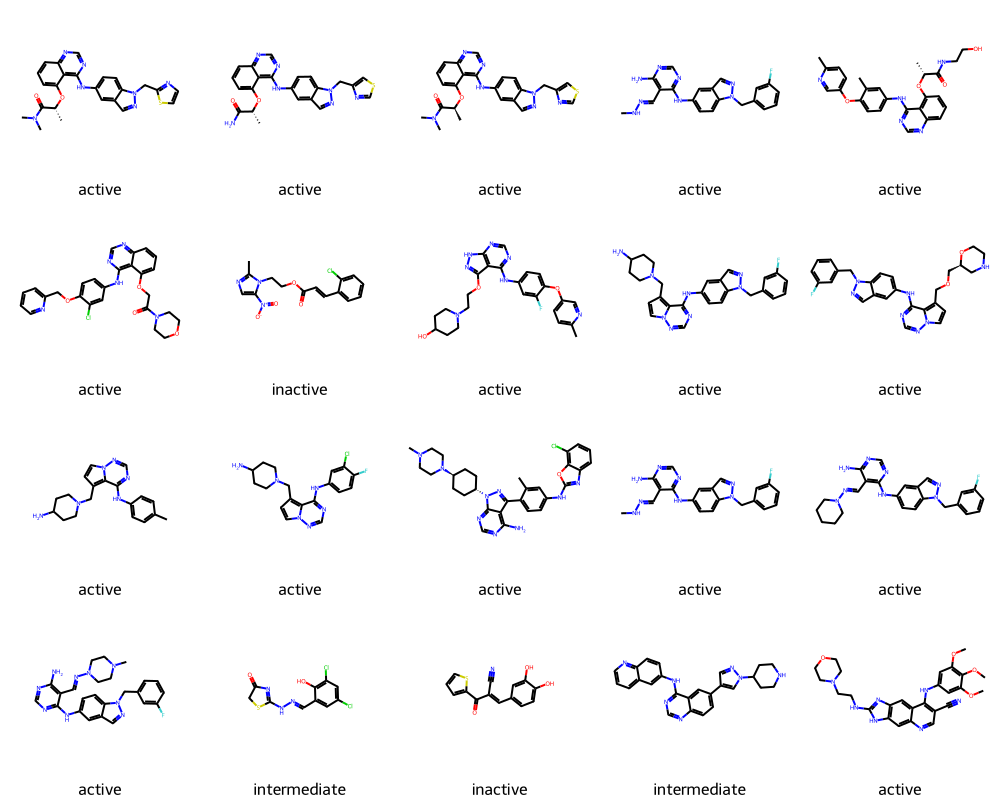

In [98]:
#draw structures in the grid
from rdkit.Chem import Draw
Draw.MolsToGridImage([x for x in df_fin1["Structure"]][:20], maxMols=100, 
                     legends=[str(x) for x in df_fin1.Receptor_class], subImgSize=(200,200), molsPerRow=5)


In [101]:
#!pip install molfeat

In [102]:
from molfeat.calc import FPCalculator
from molfeat.trans import MoleculeTransformer
from molfeat.calc import FP_FUNCS

In [103]:
FP_FUNCS.keys()

dict_keys(['maccs', 'avalon', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'pattern', 'layered', 'map4', 'secfp', 'erg', 'estate', 'avalon-count', 'rdkit-count', 'ecfp-count', 'fcfp-count', 'topological-count', 'atompair-count'])

In [104]:
calc = FPCalculator('ecfp')

In [105]:
trans = MoleculeTransformer(calc)

In [106]:
#trans

In [107]:
#!pip install datamol

In [108]:
import datamol as dm

In [109]:
#%%time
with dm.without_rdkit_log():
    df_fin1['ecfp'] = trans.transform(df_fin1.Smiles.values)

In [110]:
df_fin1.head()

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50,Structure,ecfp
0,CHEMBL257197,26.0,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4nccs4)c3)...,active,473.562,4.08340,9.0,1.0,7.585027,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,CHEMBL257196,140.0,C[C@@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)...,active,445.508,3.48050,9.0,2.0,6.853872,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL256996,130.0,C[C@H](Oc1cccc2ncnc(Nc3ccc4c(cnn4Cc4cscn4)c3)c...,active,473.562,4.08340,9.0,1.0,6.886057,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL497697,361.0,CN/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(F)c2)c1,active,390.426,2.89280,8.0,3.0,6.442493,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL271668,200.0,Cc1ccc(Oc2ccc(Nc3ncnc4cccc(O[C@H](C)C(=O)NCCO)...,active,473.533,4.05334,8.0,3.0,6.698970,<rdkit.Chem.rdchem.Mol object at 0x000001EE47C...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
train, test = train_test_split(df_fin1)

In [113]:
train.head(1)

,Molecule ChEMBL ID,Standard Value,Smiles,Receptor_class,MW,LogP,NumHAcceptors,NumHDonors,pIC50,Structure,ecfp
2879,CHEMBL3133816,13.0,CC(=O)c1ccc2[nH]c3nccc(Nc4cccc(O)c4)c3c2c1,active,317.348,4.3679,4.0,3.0,7.886057,<rdkit.Chem.rdchem.Mol object at 0x000001EE4CE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [114]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()

from xgboost import XGBRegressor
model = XGBRegressor()

In [115]:
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

In [116]:
#!pip install yellowbrick

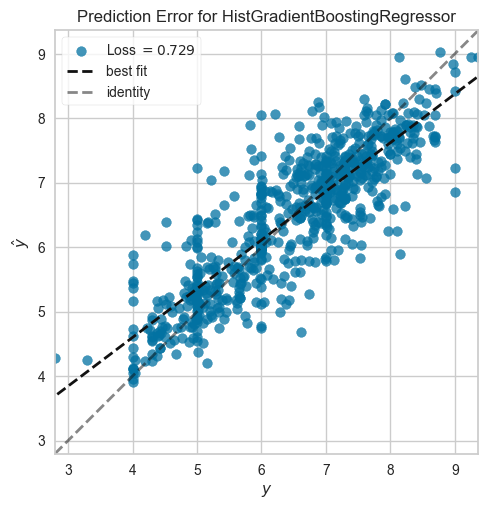

In [117]:
from yellowbrick.regressor import prediction_error, residuals_plot

visualizer = prediction_error(model,np.stack(train.ecfp),train.pIC50,np.stack(test.ecfp),test.pIC50)

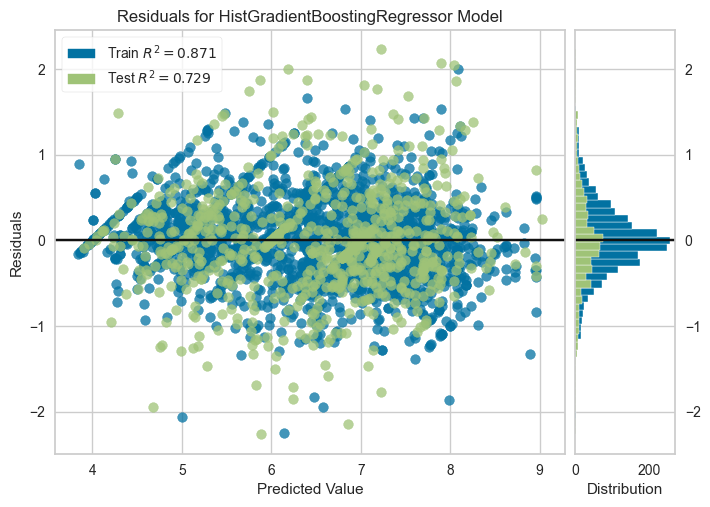

In [119]:
viz = residuals_plot(model,np.stack(train.ecfp), train.pIC50, np.stack(test.ecfp), test.pIC50, is_fitted=True)

In [121]:
#can we try to generate ecfp using this method below?
# what is the difference between ecfp and maccs?
#if we generate maccs keys using the method below, will it give the same results/same fps if we generate it via FP_funcs, molecule transformer and datamol?
#how does the result of score compare with lazy predict?

In [120]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()

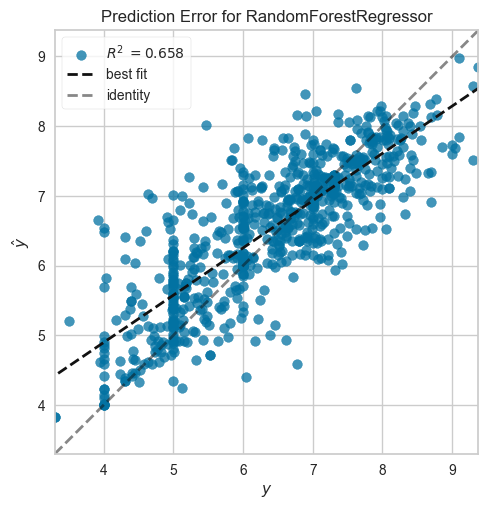

In [220]:
visualizer2 = prediction_error(model2,np.stack(train.maccs_fp),train.pIC50,np.stack(test.maccs_fp),test.pIC50)

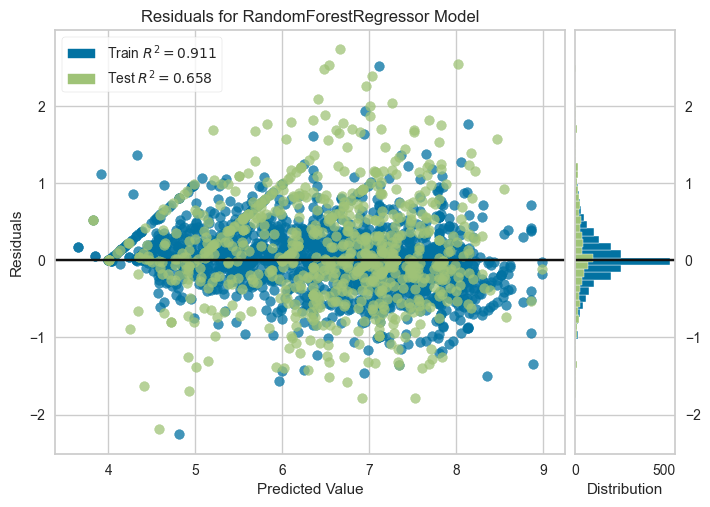

In [221]:
viz2 = residuals_plot(model2,np.stack(train.fp), train.pIC50, np.stack(test.fp), test.pIC50, is_fitted=True)

In [226]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
Mkeys = []
for i in df_fin1.Structure:
    maccs_bv = MACCSkeys.GenMACCSKeys(i)
    arr = np.zeros((0,), dtype = np.int8)
    DataStructs.ConvertToNumpyArray(maccs_bv, arr)
    Mkeys.append(arr)

Mkeys = pd.DataFrame(Mkeys)

In [227]:
Mkeys

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3092,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3093,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3094,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [229]:
df_comb = pd.concat([Mkeys, df_fin1['pIC50']], axis=1)

In [230]:
df_comb

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,7.585027
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,6.853872
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,6.886057
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,0,1,0,6.442493
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,6.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,0,10.221849
3092,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,7.229148
3093,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,8.407823
3094,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,8.254145


In [232]:
X = df_comb.drop('pIC50', axis = 1)

In [233]:
Y = df_comb.pIC50

In [240]:
X.shape, Y.shape

((3096, 167), (3096,))

In [241]:
#Remove the low variance features
from sklearn.feature_selection import VarianceThreshold

In [250]:
selection = VarianceThreshold(threshold=0.05)
X = selection.fit_transform(X)

In [251]:
X.shape

(3096, 63)

In [254]:
from sklearn.model_selection import train_test_split

In [255]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [256]:
X_train.shape, Y_train.shape

((2476, 63), (2476,))

In [257]:
X_test.shape, Y_test.shape

((620, 63), (620,))

In [259]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5946323159826057

In [271]:
Y_pred = model.predict(X_test)

In [272]:
Y_pred = pd.DataFrame(Y_pred, columns = ['predicted_pIC50'])

In [273]:
Y_pred

,predicted_pIC50
0,7.447923
1,7.510543
2,4.809360
3,6.307523
4,5.436071
...,...
615,4.310008
616,6.430147
617,8.267199
618,7.436202


In [287]:
Y_test1 = pd.DataFrame(Y_test, columns = ['real_pIC50'])
Y_test1

,real_pIC50


In [284]:
df7 = pd.concat(Y_test, Y_pred, axis =1)

C:\Users\e.tiu\AppData\Local\Temp\ipykernel_1872\2940665036.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df7 = pd.concat(Y_test, Y_pred, axis =1)


TypeError: concat() got multiple values for argument 'axis'

In [ ]:
sns.scatterplot(x= Y_test, y = Y_pred.predicted_pIC50)